# Project Group - 11

    Name:                     Student number:
    Sunny van Leeuwen         4698533
    Femke Mureau              4662318
    Josephine Scholte         4884787
    Jochem van Dijk           4936217
    Matthias Santing          4703758

# Research Objective: What is the effect of having a driving license on *Travel* behaviour?


To be able to answer the research objective, first the sub questions mentioned below will be answered:
-	How many driver licenses are there in the Netherlands and how are they distributed over the country?
-	What is the effect of region on having a driving license?
-	What is the effect of having a driving license on the participation in public transport?
-	Is there a correlation between having a driving license and having a student ov chipcard?
-	What is the effect of age on traffic behaviour?

# Contribution Statement

*Be specific. Some of the tasks can be coding (expect everyone to do this), background research, conceptualisation, visualisation, data analysis, data modelling*

At the start of each chapter, a link is provided to the notebook on Github of the team member. In that notebook all the written code can be found, which is used to create the figures.

**Sunny van Leeuwen**: What is the effect of age on travel behaviour?

**Femke Mureau**: What is the effect of having a driving license on the participation in public transport?

**Josephine Scholte**: Is there a correlation between having a driving license and having a student ov chipcard?

**Jochem van Dijk**: How many driver licenses are there in the Netherlands and how are they distributed over the country?, combine all codes for final report

**Matthias Santing**: What is the effect of region on having a driving license?, combine all codes for midterm

# Data Used

In [1]:
import numpy as np
import pandas as pd
import cbsodata as cbs
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import time
from IPython.display import Image
from IPython.display import display

Also, a new folder is created in which the figures can be saved

In [2]:
if not os.path.exists("Images"):
    os.mkdir("Images")

## Import all the datasets needed

Firstly, all the necessary datasets are imported directly from the CBS with the cbsodata packages.
Depending on the internet connection and computer specifications, this can take a couple of minutes.

In [3]:
#data_travel = pd.DataFrame(cbsodata.get_data('84713ENG'))
tic = time.perf_counter()
df_regio = pd.DataFrame(cbs.get_data('83488ENG')) # Insert dataset with Licenseholder data
tac = time.perf_counter()
print(f'Regional data is downloaded in {tac-tic:.2f} seconds : Progress is {1/7*100:.2f} %')

tic = time.perf_counter()
df_population = pd.DataFrame(cbs.get_data('37259ENG'))   # Insert dataset with population data
tac = time.perf_counter()
print(f'Population data is downloaded in {tac-tic:.2f} seconds : Progress is {2/7*100:.2f}%')

tic = time.perf_counter()
df_trips = pd.DataFrame(cbs.get_data('84708ENG')) # Insert dataset with trips values for different modes
tac = time.perf_counter()
print(f'Trips data is downloaded in {tac-tic:.2f} seconds : Progress is {3/7*100:.2f}%')

tic = time.perf_counter()
data_traffic_original = pd.DataFrame(cbs.get_data('84707ENG'))
tac = time.perf_counter()
print(f'Traffic data is downloaded in {tac-tic:.2f} seconds : Progress is {4/7*100:.2f}%')

tic = time.perf_counter()
data_motief = pd.DataFrame(cbs.get_data('84713NED'))
tac = time.perf_counter()
print(f'Travel motive data is downloaded in {tac-tic:.2f} seconds : Progress is {5/7*100:.2f}%')

tic = time.perf_counter()
data_mot_original = pd.DataFrame(cbs.get_data('84709ENG')) # insert dataset with modes of travel data
tac = time.perf_counter()
print(f'Modes of travel data is downloaded in {tac-tic:.2f} seconds : Progress is {6/7*100:.2f}%')

tic = time.perf_counter()
df_pop_henk = pd.DataFrame(cbs.get_data('7461ENG'))   # Insert dataset with population data
tac = time.perf_counter()
print(f'Population dataset 2 is downloaded in {tac-tic:.2f} seconds : Progress is {7/7*100:.2f}%')

Regional data is downloaded in 2.82 seconds : Progress is 14.29 %
Population data is downloaded in 82.44 seconds : Progress is 28.57%
Trips data is downloaded in 25.94 seconds : Progress is 42.86%
Traffic data is downloaded in 1.36 seconds : Progress is 57.14%
Travel motive data is downloaded in 85.80 seconds : Progress is 71.43%
Modes of travel data is downloaded in 69.28 seconds : Progress is 85.71%
Population dataset 2 is downloaded in 3.93 seconds : Progress is 100.00%


## How many people have one?
[Jochem](https://github.com/JosephineScholte/TIL6022-LabAssignments-group-11/tree/main/Project/Jochem)

First, we are going to take a look at some general data about driver license holders in the Netherlands. In 2022, 11 444 831.0 people had a driving licence while the Netherlands had 17 590 672.0 inhabitants. This meant that 65 % of the population has a driving licence at the start of 2022. The figure below shows that this number has slightly risen the last couple of years. Exact population data from 2020 till 2022 is missing in the dataset so this is not shown in the figure.


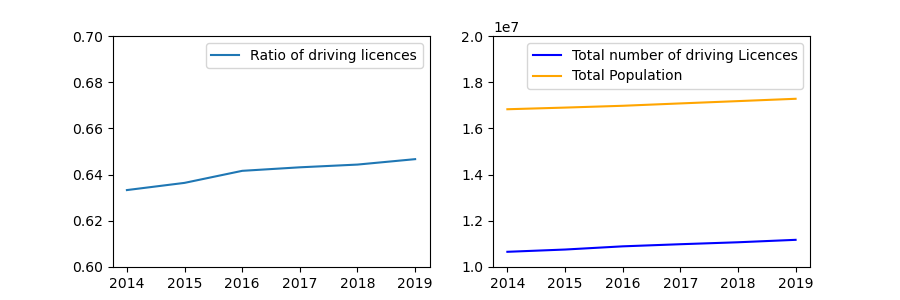

In [4]:
display(Image("./Images/Ratio.png"))

The next plot shows three different plots. The first plot is a combination of the second and third plot. The second plot shows the population of the Netherlands per age group and the third plot shows the amount of driving licences in the Netherlands. The first plot then shows the ratio of each age group with a driving licence. The data ranges from 2014 till 2019. Interestingly, older people seem to have got their driving licence in the past year. Most middle-age people already have a driving licence so it would be expected that this age group will already have a driving licence, but it seems that this is not the case. Age can also play a role in the ability of someone to drive so it could be that a lot of people lost their licence or a big group of older people didn't have a driving licence at all. This could explain the rise in driving licences for this group. Note that this rise isn't related to the increase of older people. If the ratio goes up, the ratio of driving licences among this group increases. Graph two and three can be misleading as they are more or less related to population growth. The ratio of old people with a driving licence can still tell us something about their travel behaviour. If this ratio is low, lower than 60 percent, a lot of people are dependent on public transport or other transportation means.

Another notion can be made about the age group from 18 to 19 years. This ratio has increased steadily for the past couple of years. This could be due to the fact that this age group can get their driving licence on a younger age. Therefore this group is getting bigger as more people are taking driving lessons. The ratio in the two age groups above 18 and 19 stays about the same. This means that these new rules haven't affected this group as much. It is interesting though that in the age group from 25 to 29 years, about 80 percent of them has a driving licence. This is quite a high percentage, which can also impact the travel behaviour of these age groups.

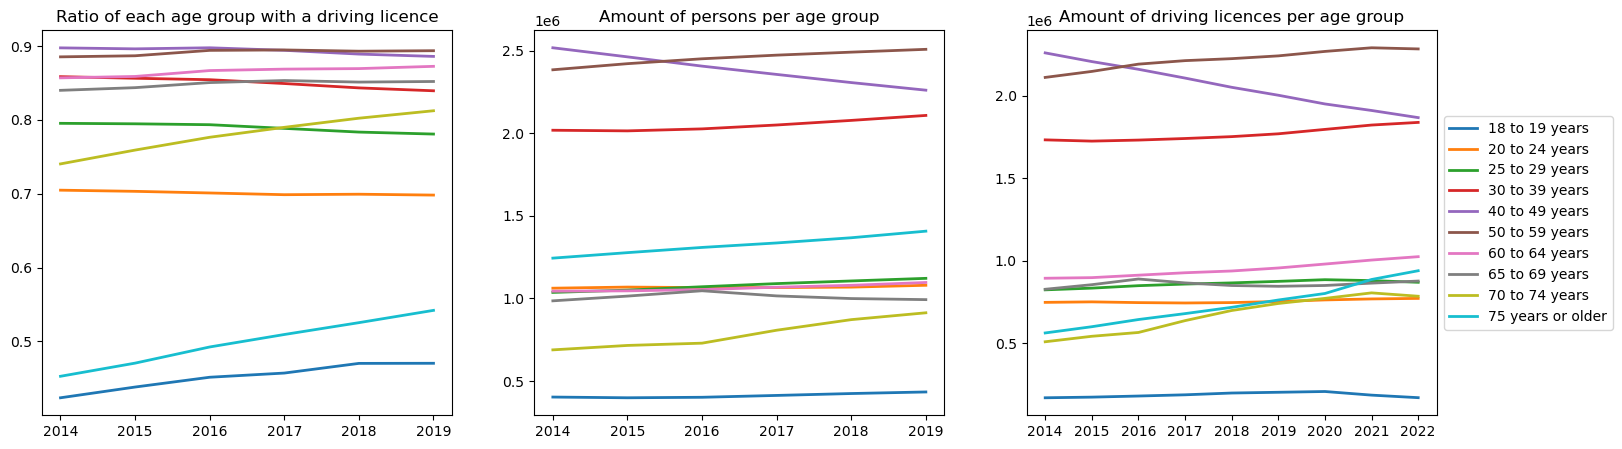

In [5]:
display(Image("./Images/Three_plots.png"))

The next plots show the total number of driving licences for heavy vehciles and the distribution for light vehicles. Interestingly the licences for trucks and buses with a trailer are gradually lowering and therefore the total number of licences is getting lower. The licences for a truck and bus excl. a trailer stay the same. This change in licences could be due to the fact that more people with such a specific licence are retiring. New truck drivers might not need a licence where they can drive with a trailer as the demand for this is lower. Still, the number of drivers with a licence incl. a trailer is higher.

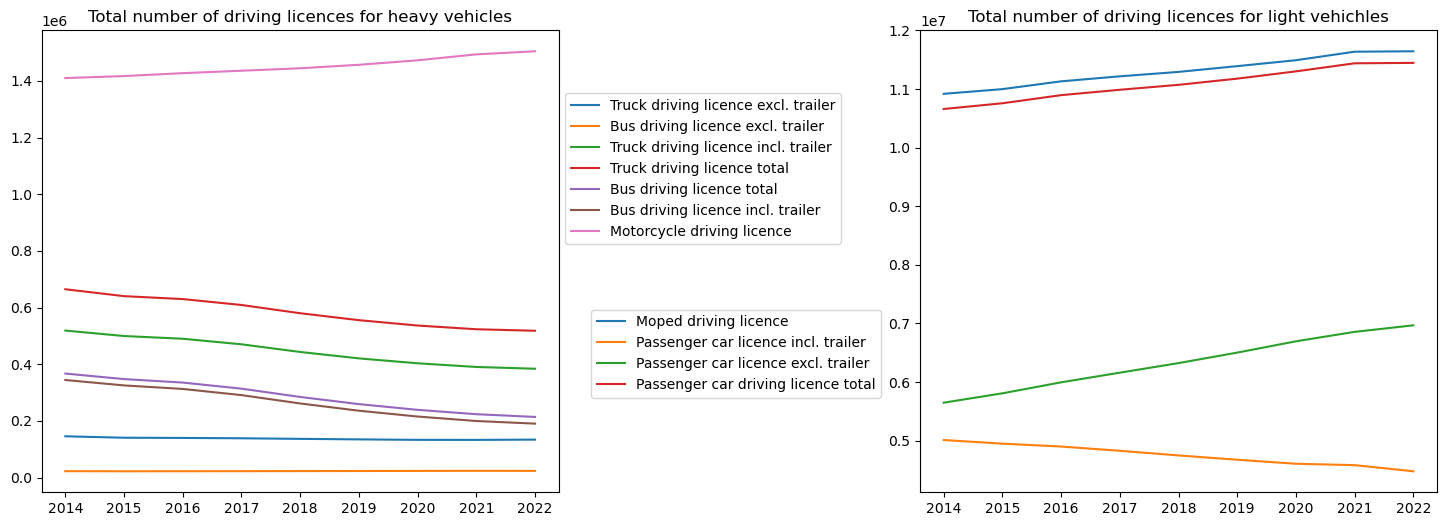

In [6]:
display(Image("./Images/Two_plots.png"))

The next series of subplots show the driving licences for light vehicles per province. This is interesting to see the changes throughout the years. Especially because the next plot shows this data for 2 different years. These plots show the changes from 2014 to 2019. The driving licences with or without a trailer can also differ per province but the behaviour for the total amount of driving licences is almost equal for all provinces.

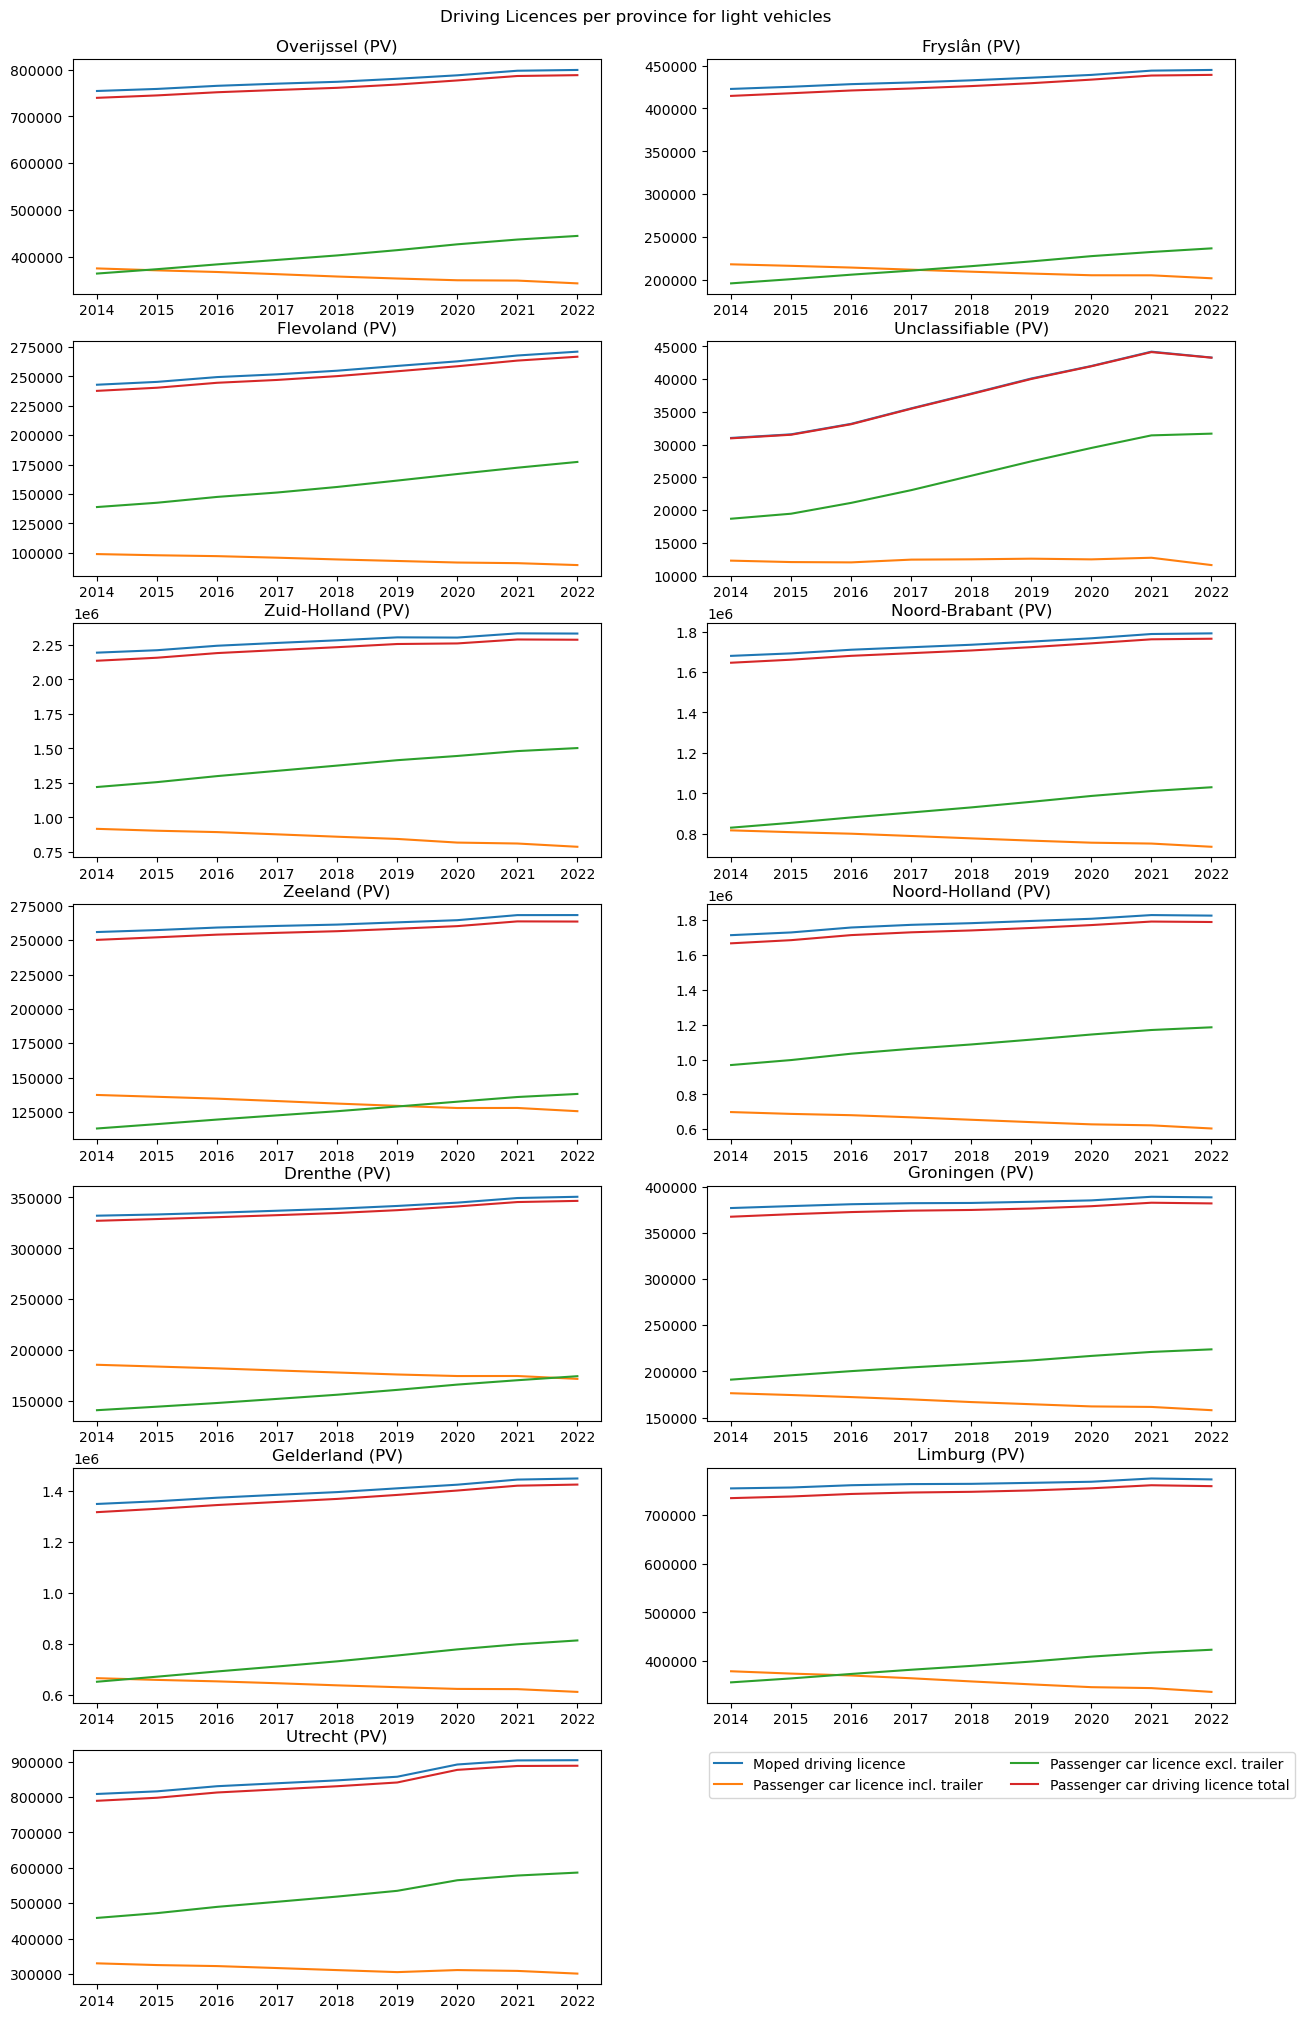

In [7]:
display(Image("./Images/Light.png"))

# Regional data processing
[Matthias](https://github.com/JosephineScholte/TIL6022-LabAssignments-group-11/tree/main/Project/Matthias)

In this section, a look is taken at what the effect on the region is on mode of choice behaviour and whether the region can have an effect on having a driver license. First, this is studied by analyzing the percentage of driver license holders per province of The Netherlands. After that, the travel mode behaviour is studied per region and per weekday. 

### Driver Licenses per Region
Now the dataset is filtered, and the regional percentage figures can be plotted with GeoPandas. First the map is downloaded from PDOK and then the percentage is added to the geopandas dataset after which the regional data can be plotted. There are two figures shown to demonstrate the difference over the years.

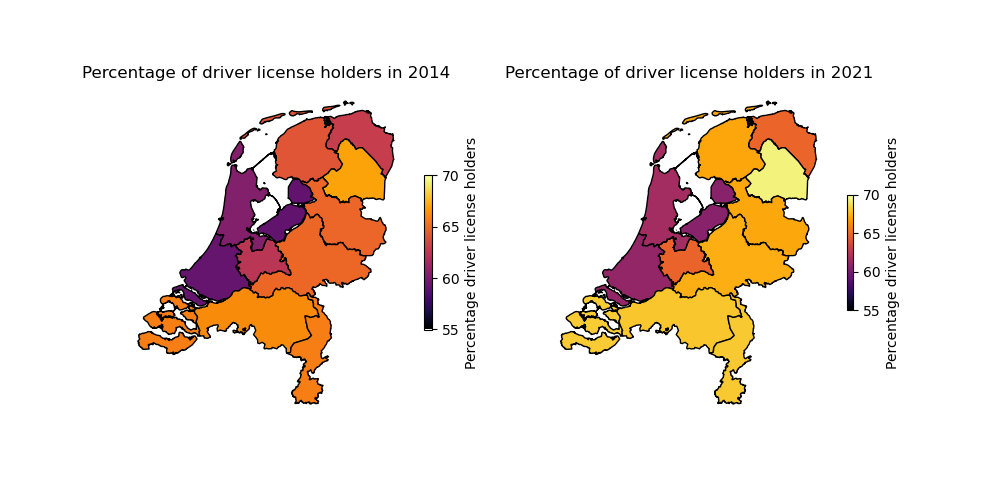

In [8]:
display(Image("./Images/Percentage_driverlicense.png"))

Above, two figure are presented both with the same information which is the percentage of driver license holders per province of The Netherlands. The left figure presents the data from 2014 and the figure on the right presents the data from 2021. The lighter the colour, the higher the percentages of driver license holders. From the figures, we can retrieve two findings. Firstly, the overall percentage of driver license holders in The Netherlands is increasing, as the figure on the right is lighter than the figure on the left. This is the case for all provinces. The second finding can be seen on both figures as well. The 'Randstad' region is much darker than the other parts of the country. There can be several explainations for this, but there are a lot more public transport opportunities in these areas compared to the rural areas in the north, east and south. Therefore, the people in the 'Randstad' region are less dependable on a car than people in the rest of the country 

### Trips per mode of travel per region

For the region characterisitcs of Public Transport use, only the years 2018 and 2019 are considered as this are the non-covid years which are available for data

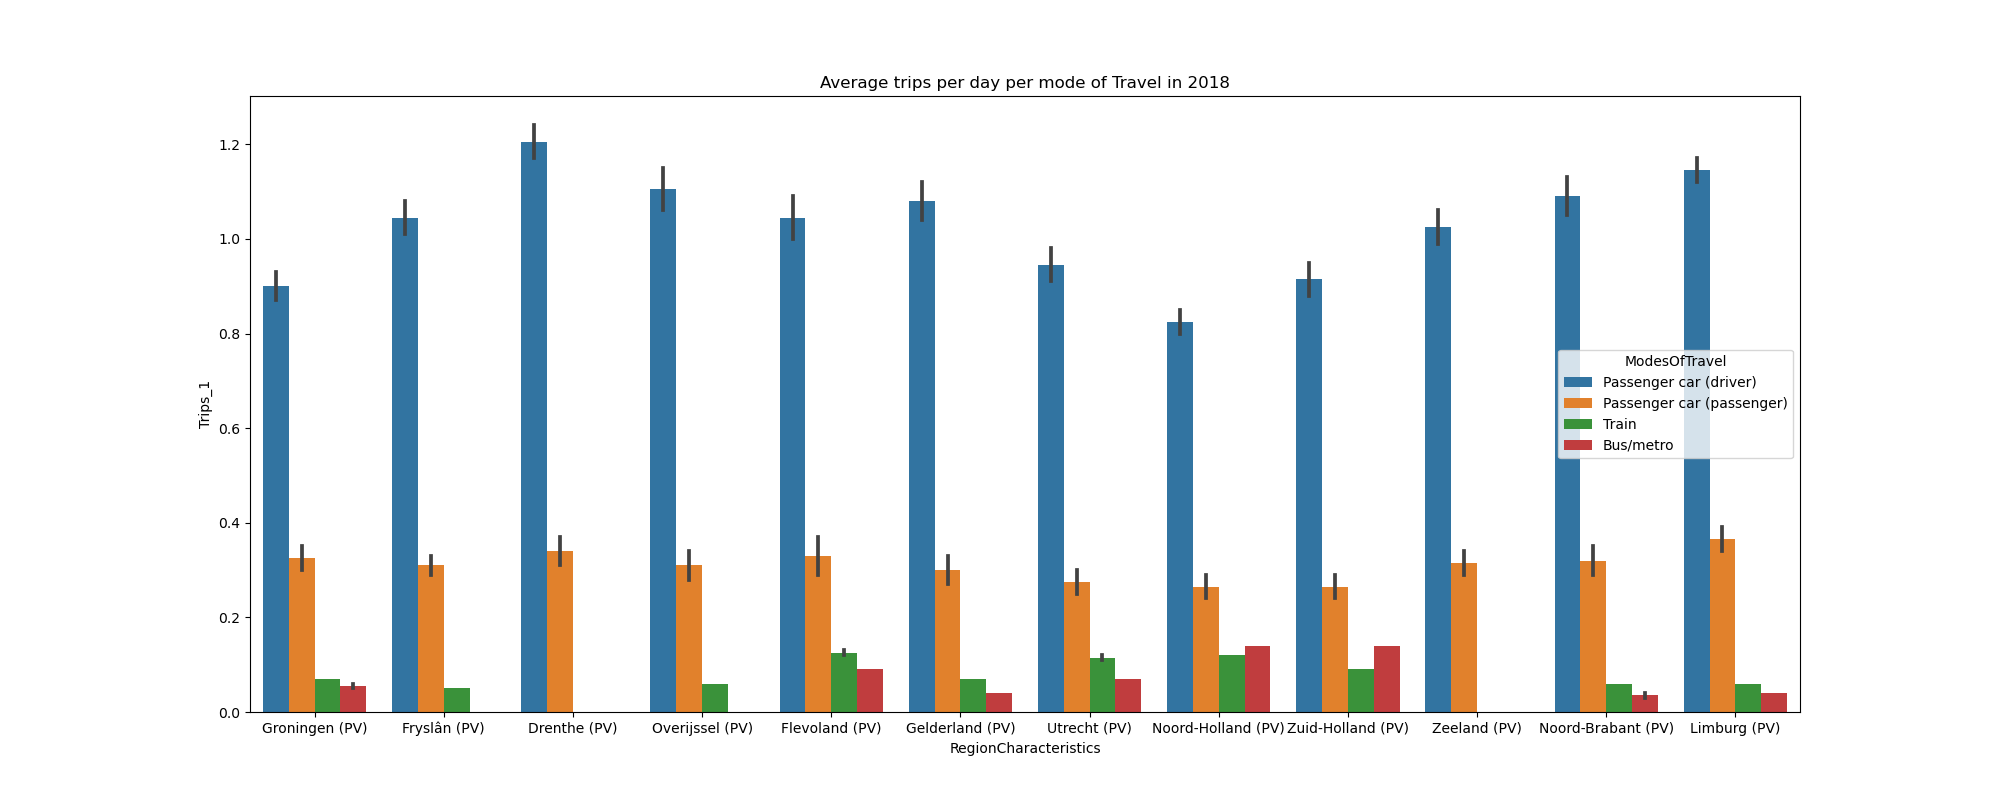

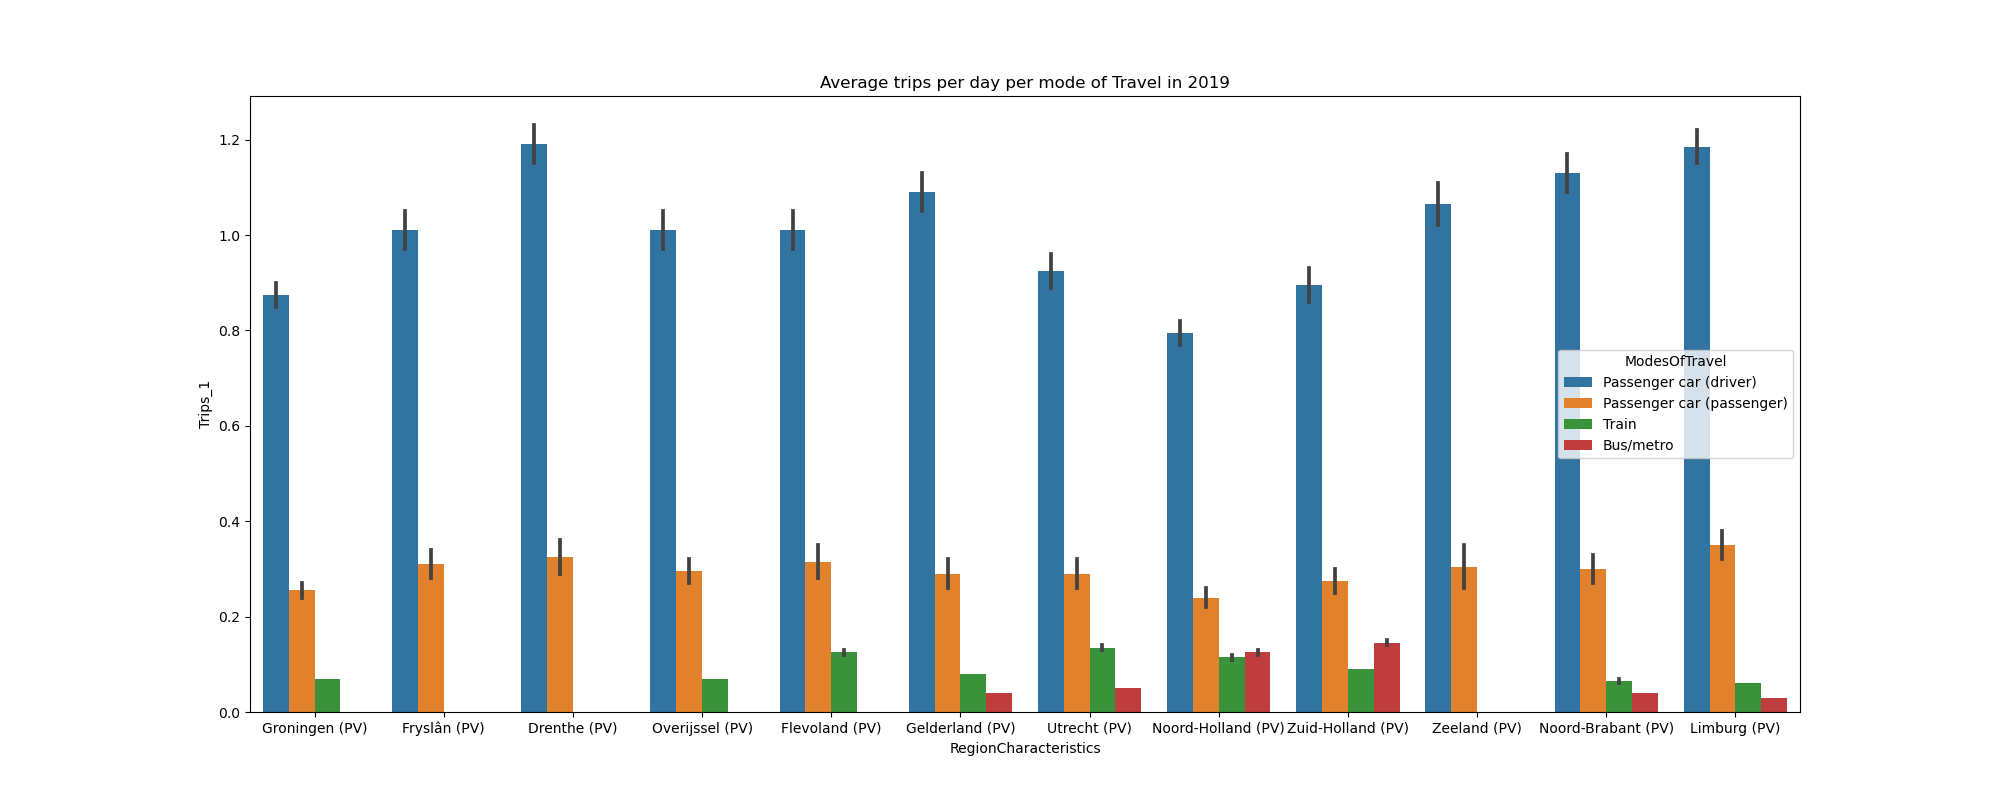

-----------------------------------------------------------------------------------------------------------------------


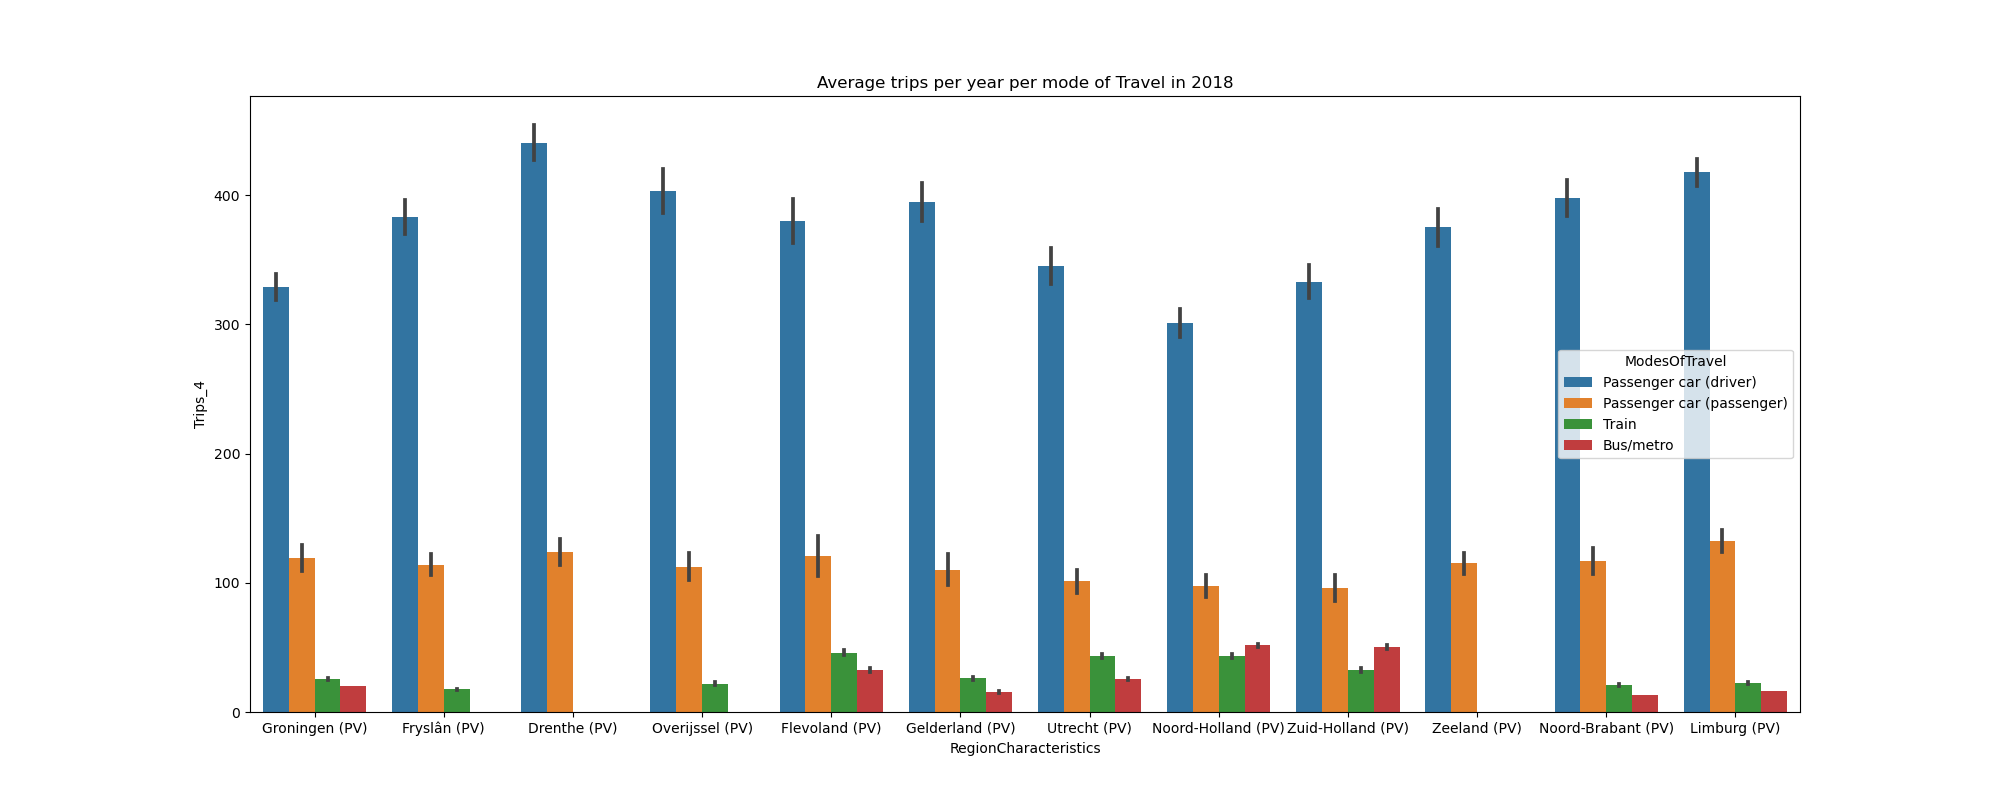

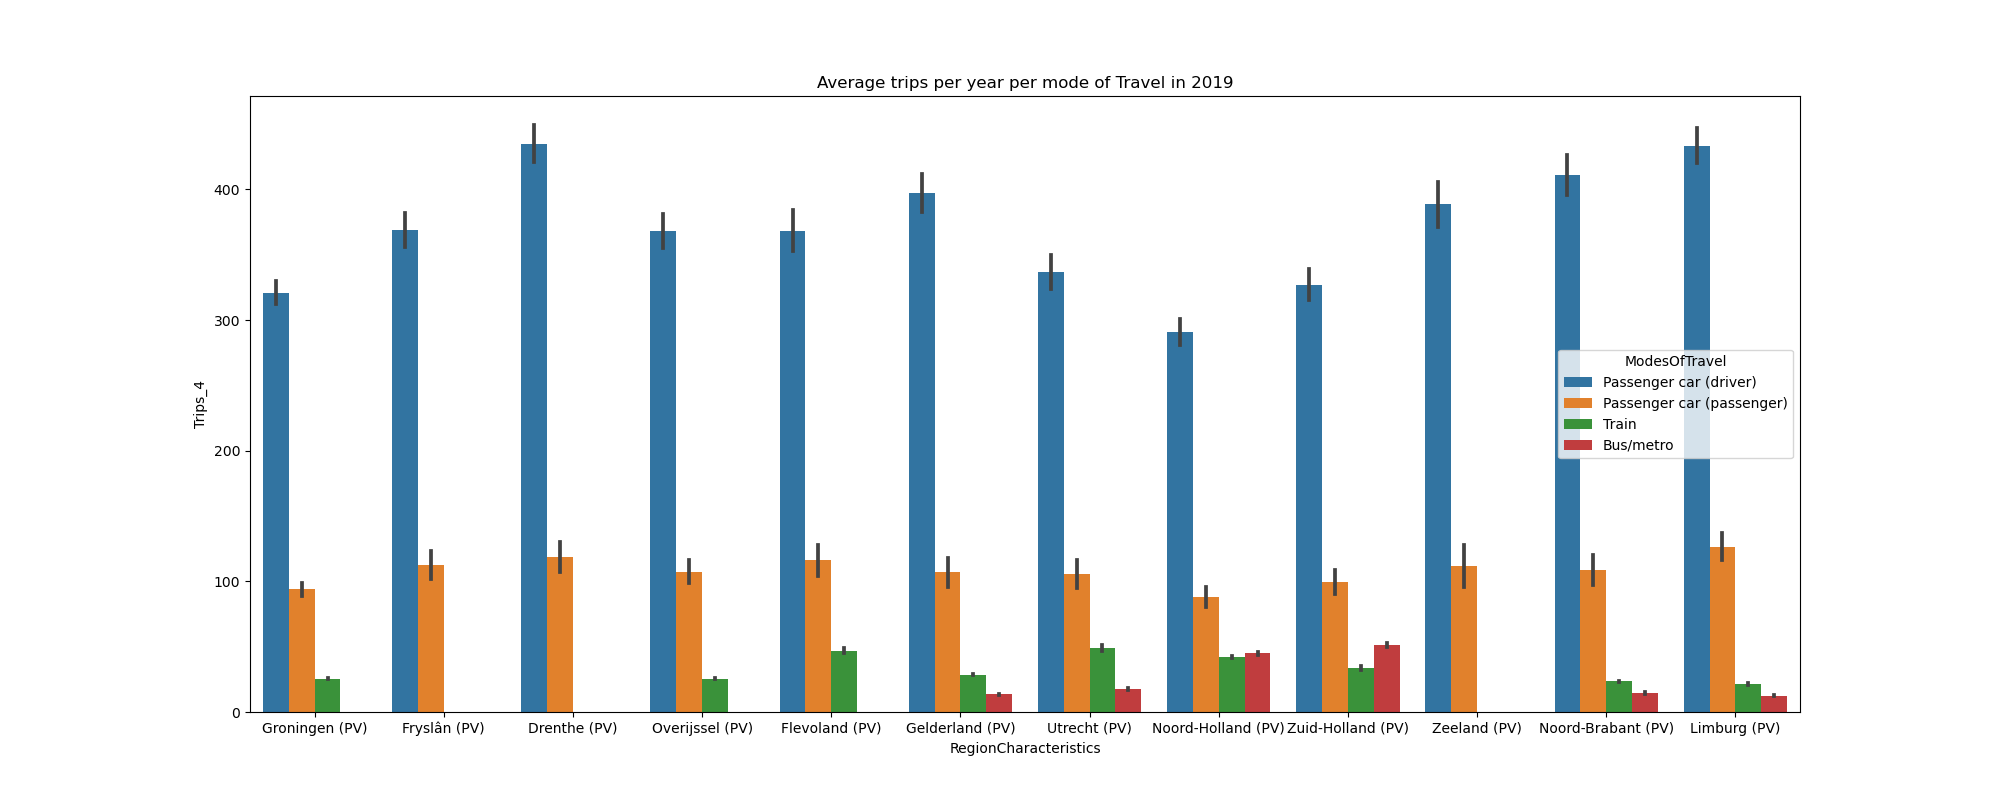

In [9]:
from IPython.display import Image
from IPython.display import display
x = Image(filename="./Images/Barplot2018.png")
y = Image(filename="./Images/Barplot2019.png")
x1 = Image("./Images/Total_trips_2018.png")
y1 = Image("./Images/Total_trips_2019.png")

display(x, y)

print('-----------------------------------------------------------------------------------------------------------------------')

display(x1, y1)

From these plots, it is very clear that the regions which have more driver licenses on avarage, also have more car trips than average. This can be seen that the blue bar for Utrecht, Noord-Holland and Zuid-Holland are the lowest and for example Drenthe (the province with the highest percentage of driver license holders) has the most car trips. The bar plots above are relating to geoplot of the provinces in that case. <br>
Furthermore, the provinces Noord & Zuid Holland (Randstad) do also have a lot of public transport trips as this is very accessible in these regions. The bus and metro data in these areas is very high compared to other regions which mostly do not have a metroline at all.  

Sadly, there is some data missing from the public transport trips of Zeeland, Friesland en Drenthe to make a complete comparison


### Comparison per week day
As this now is the trips per region, it can be helpfull to also take a look at the number of trips per day, to see whether the day of travel makes a difference. So first the data is filtered for each weekday and then the data is plotted in a boxplot to see what the values are for each day.

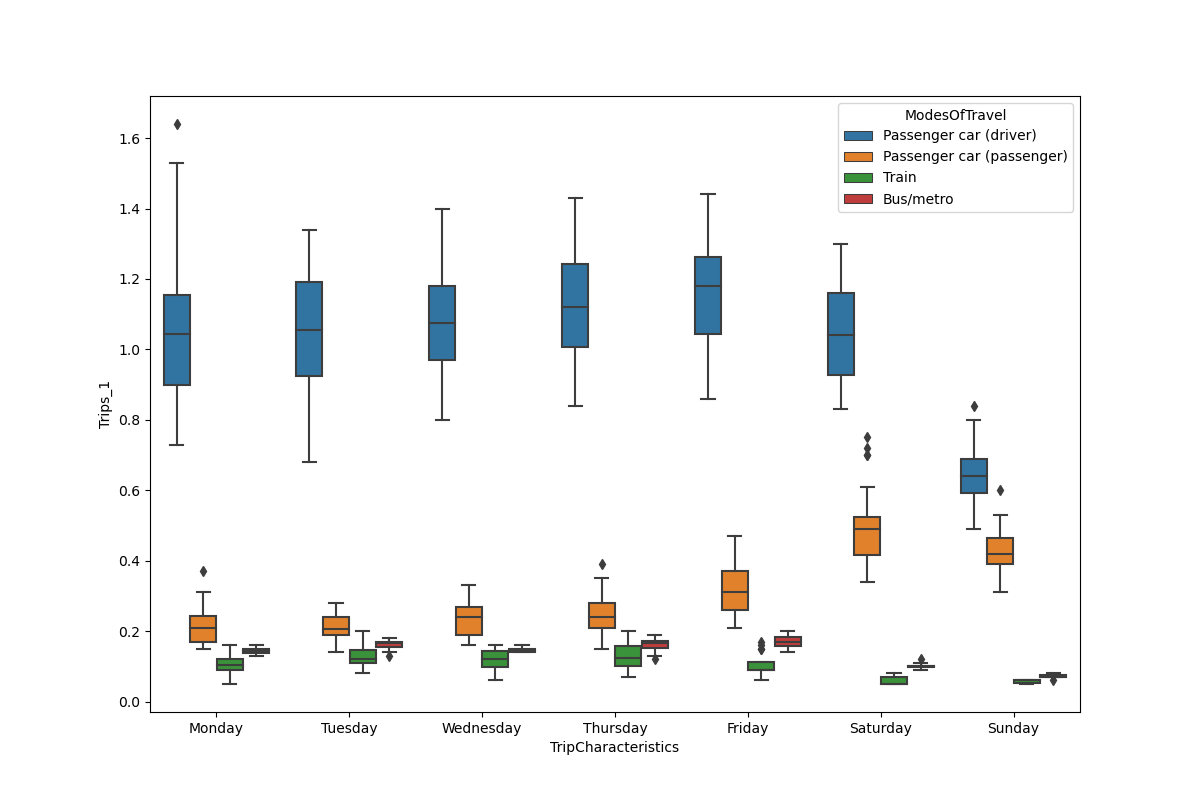

In [10]:
display(Image("./Images/Boxplot.png"))

From this, we can conclude that the regional data is very much relating to the weekdays as in these days the most trips are made in terms of public transport. The public transport trips on the weekdays are higher than in the weekends as less people travel to work then logically.<br>
On the other hand, regarding the car trips (driver) there is not much difference between a weekday and a saturday. There is between a weekday and a sunday however as the average trip on a sunday with a car is very low. <br>
On Saturday and Sunday however, the passenger trips in the car are much higher compared to weekdays. This can be seen that on weekends, more family or leisure trips are made generally instead of one person driving to work.

## Driving license and public transport use
[Femke](https://github.com/JosephineScholte/TIL6022-LabAssignments-group-11/tree/main/Project/Femke)

To be able to answer our main research question, we this first want to find out if there is actally a difference in people's use of public transport based on whether they have a driving license or not. Our hypothesis is that people with a driving license will make less use of public transport than people who do not have a driving license.

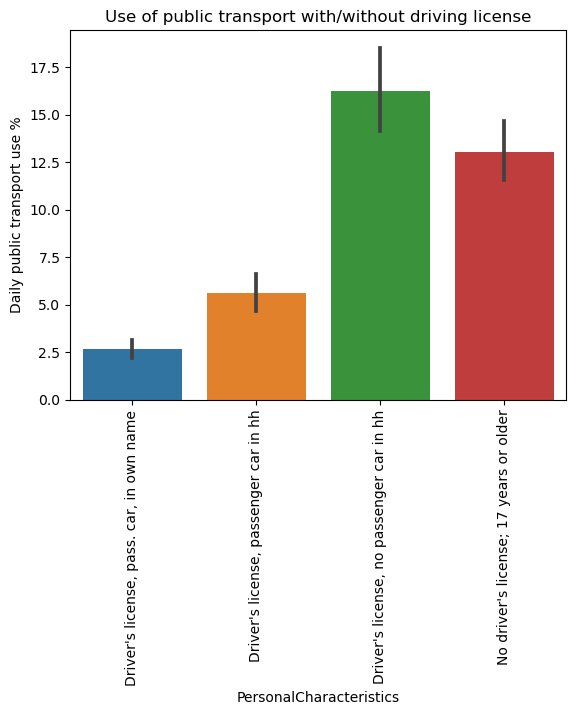

In [11]:
display(Image("./Images/Ov_with_driving.png"))

As can be seen from the plot above, people with a driving license but without access to a car actually make more use of public transport than people who do not have a driving license. To check whether or not this unexpected outcome is caused by the data from the covid years (2020-2021), another plot is created where each year is showed separated.

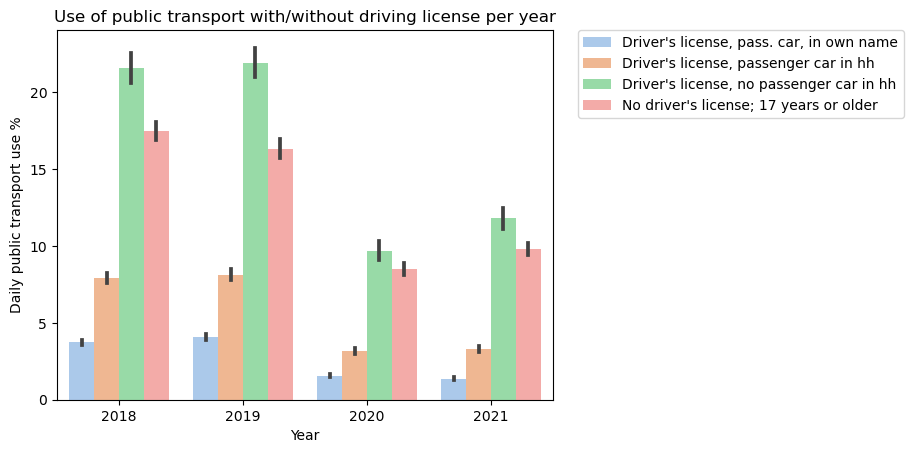

In [12]:
display(Image("./Images/Ov_with_driving_year.png"))

The plot shows that the distribution of data in the covid years does not differ much from 2018 and 2019. This means that our hypothesis is not completely true. People without a driving license do not per se make more use of public transport than people with a driving license.

In order to be able to explain this we will take a look into the personal characteristics of people who make the least use of public transport.

In [13]:
from IPython.display import HTML
from IPython.display import IFrame
x2 = IFrame(src='./Images/low_usage_2018.html', width='100%', height=500)
y2 = IFrame(src='./Images/low_usage_2019.html', width='100%', height=500)
display(x2, y2)

As can be seen from the plot, retired and elderly make very little use of public transport. The other groups that show up are disabeled, unemployed and low-educated people. If these groups whith a low daily use of public transport also seem to have a low rate of driving license holders, this could explain the previous plots.
To check this we will first look into the driving license holders per age group.

## Driver license  vs ov-chipcard
[Josephine](https://github.com/JosephineScholte/TIL6022-LabAssignments-group-11/tree/main/Project/Josephine)

In [14]:
IFrame(src='./Images/distance.html', width='100%', height=600)

As you can see in the barplot, the distance travelled with train by students with a week pass is seven times as big as by people without a student ov chipcard. This makes sense because the train costs more money with a normal ov chipcard. Although students with a week pass still use the car quite a lot: 7,5 kilometers a day on average. The bus and metro are used for shorter distances than the train and car.

In [15]:
IFrame(src='./Images/modes.html', width='100%', height=600)

The daily distance travelled is plotted against the number of daily trips. Also the regression lines per personal characteristic are plotted. It is visible that the number of trips correlates with the distance travelled. More trips on a day means in general a bigger distance travelled. It is also visible that students with a week pass make the most trips per train and per bus and metro. The car is both used for shorter and longer trips, whereas the distance travelled with the train is quite long. It seems that students with a week pass travel greater distances than people without a student week pass. Students travel both by car, train and bus and metro.

Now students with a week pass will be compared with their age group (18 to 24 years).

In [16]:
IFrame(src='./Images/distance_by.html', width='100%', height=600)

In this plot it is visible that people in the age 18 to 24 years travel greater distances with the car than with the public transport. Although students with a week pass travel greater distances with the car than with the bus and metro. The opposite of students with a student ov chipcard, which are mainly in the same age category. But a big part of this age category is already working because they finish their education young. They probably have more money to spend so they travel with car and they can't have a student ov chipcard. 

In [17]:
IFrame(src='./Images/modes_trend.html', width='100%', height=600)

The daily distance travelled is again plotted against the number of daily trips. Also the regression lines per personal characteristic are plotted. It is visible that the number of trips correlates with the distance travelled. The plots look a bit the same as the previous scatterplots. Although there is not a clear gap between the two personal characteristics categories. It can be concluded that students with a week pass travel greater distances with the public transport than people without a week pass, but with a driving license. A considerable part of the students with a week pass do have a driving license as you can see in the plots that they also drive a car.

## Travel Motives
[Sunny](https://github.com/JosephineScholte/TIL6022-LabAssignments-group-11/tree/main/Project/Sunny)
### Number of Displacements

In [18]:
IFrame(src='./Images/motives.html', width='100%', height=600)

In the plot can be seen the number of displacements for different population categories. For the years 2019 and 2020 a reduction in the number of displacements is shown. During the year of 2020 the corona pandemia was a big topic in The Netherlands. For travelling different regulations to stop spreading the virus, wherefore the decrease of number of trips could be explained. For the decrease in 2019 not a big reason can be found. In 2021 a grow in number of trips is shown. The number of trips is not yet the same as before the corona panedemia, one of the reasons which statisfy this data is that not all regulations in the Netherlands.

The smallest contribution is the group of students with a public weekend pass. This could be satisfied with the fact that students who are living on theirself not often using public transport or the car to go to school or work. 

Side note for the plot: the total number of people is not really relevant, since one person partipates in different categories. 

In [19]:
IFrame(src='./Images/trips.html', width='100%', height=600)

In the plot above the same trends during the years are shown as in the previous plot about trip displacements. In the figures below the trend of number of trips and time duration is shown during the years for having a driving license. Therefore more detailed can be seen the decrease in the years of 2019 and 2020. The biggest change can be seen in having no driving license and an age below 17 years. The other categories are more showing the same trend.
### Changes over the years

In [20]:
x3 = IFrame(src='./Images/changes.html', width='100%', height=600)
y3 = IFrame(src='./Images/changes_duration.html', width='100%', height=600)
display(x3, y3)

Shown in the figures about trip displacement and trip duration could be seen that not very big differences are found in the population of having a driving licence, a student public transport passes or in different age groups. To look more in detail about what the differences and similarities are between having a driving license and use of public transport, the focus groups will be students and the driving license groups. 

* 'OV-Studentenkaart: geen'
* 'OV-Studentenkaart: weekabonnement'
* 'OV-Studentenkaart: weekendabonnement'

& 

*  'Rijbewijs, personenauto op eigen naam'
* 'Rijbewijs, personenauto in hh'
* 'Rijbewijs, geen personenauto in hh'
* 'Geen rijbewijs; wel 17 jaar of ouder'
* 'Geen rijbewijs; jonger dan 17 jaar'



In [21]:
IFrame(src='./Images/motives_students.html', width='100%', height=600)

In the pie charts above the travel motives are shown for different student pass categories. A very big difference is shown between in how many trips is used for going to school. If students have acces to a public transport pass the percentage difference between these groups are not very big, but if there is no acces to a public transport pass the number of trips used for going to school is significantly smaller. 

Students with a weekend public transport pass the biggest part of their trips is because of shopping and for free time activities, but for students with a weekend public transport pass is it for free time activities and going to school. Also students with a week public transport pass are using a lot more trips for going to work then students with a weekend pass. 
The distribution of travel motives for having no acces to public transport pass is different from having acces. These travel motives are more distributed over all the possible motives, but the people with no acces are having more trips during the years. This last point is shown in the bar plot figure in travel displacements and personal characteristics. 



In [22]:
IFrame(src='./Images/motives_2.html', width='100%', height=600)

Looking more into time duration of the trips in relation to travel motives give different conclusions than in relation to number of trips. The distribution of travel motives for students with a week public transport pass are not changing a lot, only the time they use for going to school is the biggest part. For students with a weekend pass the distribution is changing looking into time duration of their trips. The most time they spend for free time activities, but this is not having the highest number of trips in the previous distribution. For not having acces to public transport is also a change in the biggest contribution shown. Not the highest number of trips is used for touring and going for a walk, but they spend the longest time to go to these locations.
### Driving Licences

In [23]:
IFrame(src='./Images/motives_ov.html', width='100%', height=600)

In the piecharts above the distribution of travel motives for having a driving license can be seen. For having a driving license and have possibilities to go with car the difference between having a car on your own name or a car in hh, the distribution differences are small. The difference with having a driving license, but not direct acces to a car there are differences. The contribution of using trips to go shopping is bigger than having access to a car. Furthermore no big changes are seen in trips for going to work and free time activities. The remaning travel motives contribution is slightly smaller than for having access to a car. 

There are also two categories shown with having no driving license. People younger than 17 years olf are using mostly their trips to go to school or free time activities, but people older than 17 years to go shopping and go to work. 

People younger than 17 years old cannot have a driving license in the Netherlands, therefore no driving license, but older than 17 years is used to compare with having a driving license. No driving license are showing more or less the same contribution of travel motives as not having direct access to a car. The only small difference is that no driving license contribution of going to school is somewhat bigger. An explanation hereby could be that some more students have not a driving license yet.


In [24]:
IFrame(src='./Images/motives_duration.html', width='100%', height=600)

The piecharts of time duration of there trips for people with a car and a driving license are some different results as number of trips. The time to go shopping is less than used for touring or going to work. Number of trips of going to work and time used are in both cases a big contribution, but for touring a small number of trips is used but the time duration is a big contribution. As for number of trips, again no big difference between having a own car or car in hh are not big. In this case in time duration not big changes are seen too between having no own car, but having a driving license compare to having a car.

Again big differences are shown between age younger than 17 years old and older than 17 years but having no driving license. Younger than 17 years are spending most time to go to school or for free time activities. The biggest contribution is switch for this group to free activities instead of going to school. 

For having no driving license but being older than 17 years old, the same differences between having a driving license or not are shown as for number of trips. They spend more time to go shopping and going to school, but less time for business trips.

In [25]:
IFrame(src='./Images/motives_pass.html', width='100%', height=600)

In the plots above having no students pass is compared to having a driving license and having no driving license. The differences between having no ov students pass and having a car are the smallest for number of trips. Therefore the conclusion could be drawn that students with no student pass will use the car. For trip durations the differences are smaller for all categories, but again for having a car available and no students pass the differences are the smallest. 